# Review CNN with Cat and Dog as well as Butterfly by Keras

- Sequential model
- Functional model

## Steps for construction CNN models by Keras

#### 1 Data preprocessing

- need to match the size of the data with the input size of the CNN model, eg., Conv2D takes ######### and Conv1D takes ########


#### 2 Build model

#### 3 Compile model

#### 4 Fit model

#### 5 Prediction

#### 6 Evaluation






## CNN on the data set Dogs&cats 

### Import libraies / functions / modules

In [22]:
import glob
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
IMG_DIM = (150, 150)
np.random.seed(42)


### 1 Data preprocessing

In [23]:
# load data
_data_path = './asset4/dog_cat/'
train_dir = _data_path+"training_data/"
valid_dir = _data_path+"validation_data/"
test_dir = _data_path+"test_data/"

train_files = glob.glob(train_dir+"*") 
print(len(train_files))
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in train_files]
print(train_imgs.shape)

validation_files = glob.glob(valid_dir+'*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in validation_files]

test_files = glob.glob(test_dir+'*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in test_files]
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape,
     '\ttest dataset shape:', test_imgs.shape)

3000
(3000, 150, 150, 3)
Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3) 	test dataset shape: (760, 150, 150, 3)


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)
test_labels_enc = l e.transform(test_labels)

In [13]:
train_labels_enc
# train_labels

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen  = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [14]:
# dir(val_generator)
# train_imgs

### 2-3 build a Sequential model  and compile the Sequential model

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
input_shape = (150, 150, 3)
# designing the model
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# To comile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
# To show the construction of model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv

### 3 Fit the model 

In [17]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=2,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
100/100 [==============================] - 91s 915ms/step - loss: 0.0182 - acc: 0.9900 - val_loss: 5.3441e-07 - val_acc: 1.0000
Epoch 2/2
100/100 [==============================] - 90s 904ms/step - loss: 4.8696e-07 - acc: 1.0000 - val_loss: 1.0786e-07 - val_acc: 1.0000


### 4 Test the model

In [7]:
model.predict(test_imgs)
print('\n#Evaluate on the test data')
loss, accuracy = model.evaluate(test_imgs,test_labels_enc)
print('loss:%.4f accuracy:%.4f'%(loss,accuracy))


#Evaluate on the test data
760/760 [==============================] - 2s 2ms/sample - loss: 31.0514 - accuracy: 0.5421
loss:31.0514 accuracy:0.5421


### 5 Visualize the results of training and validation

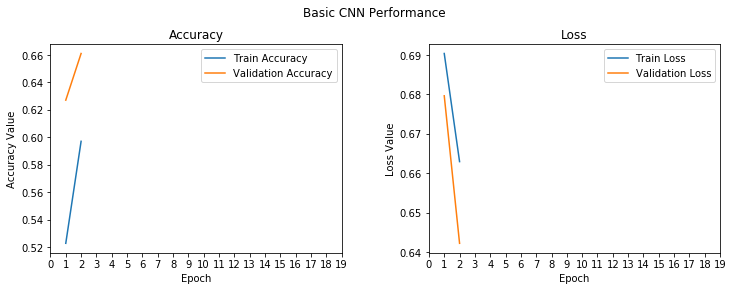

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,3))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Ex1.  build a funcation model fro Dogs&cats 

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from keras.models import Sequential
from keras import optimizers
from keras.models import Model

Using TensorFlow backend.


In [10]:
input_shape=(150,150,3)
img_input = Input(shape=input_shape)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(img_input)
x = MaxPooling2D((2, 2), padding='same')(x)
    
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
    
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
    
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x= Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dense(128,activation='relu')(x)
output = Dense(1,activation='sigmoid')(x)

model = Model(img_input, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 128)       0   

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/10
100/100 [==============================] - 39s 388ms/step - loss: 0.6843 - accuracy: 0.5513 - val_loss: 0.6888 - val_accuracy: 0.5720
Epoch 2/10
100/100 [==============================] - 38s 384ms/step - loss: 0.6372 - accuracy: 0.6367 - val_loss: 0.5859 - val_accuracy: 0.6880
Epoch 3/10
100/100 [==============================] - 38s 381ms/step - loss: 0.5896 - accuracy: 0.6867 - val_loss: 0.5744 - val_accuracy: 0.7430
Epoch 4/10
100/100 [==============================] - 38s 383ms/step - loss: 0.5459 - accuracy: 0.7183 - val_loss: 0.6984 - val_accuracy: 0.6580
Epoch 5/10
100/100 [==============================] - 38s 383ms/step - loss: 0.5081 - accuracy: 0.7553 - val_loss: 0.4574 - val_accuracy: 0.7300
Epoch 6/10
100/100 [==============================] - 38s 380ms/step - loss: 0.4875 - accuracy: 0.7653 - val_loss: 0.4389 - val_accuracy: 0.7510
Epoch 7/10
100/100 [==============================] - 38s 383ms/step - loss: 0.4558 - accuracy: 0.7893 - val_loss: 0.7348 - val_ac

In [12]:
model.predict(test_imgs)
print('\n#Evaluate on the test data')
loss, accuracy = model.evaluate(test_imgs,test_labels_enc)
print('loss:%.4f accuracy:%.4f'%(loss,accuracy))


#Evaluate on the test data
760/760 [==============================] - 2s 3ms/step
loss:76.6749 accuracy:0.7224


## Ex2. butterfly dataset for CNN


## (a) Sequential model on butterfly data

In [13]:
import os
from datetime import datetime
from keras.models import *
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Activation, Flatten, Dense, UpSampling2D
from keras.models import *
from keras.optimizers import SGD,Adam,Adagrad,Nadam,RMSprop
from keras.callbacks import TensorBoard,ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [14]:
IM_HEIGHT, IM_WIDTH, IM_CHANNEL = 150, 150, 3
_data_path = './asset3/data/'
train_data_dir = _data_path+"train/"
valid_data_dir = _data_path+"valid/"
test_data_dir = _data_path+"test/"

train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [15]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(IM_HEIGHT, IM_WIDTH),
        batch_size=100,
        class_mode="binary"
    )
val_generator = val_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(IM_HEIGHT, IM_WIDTH),
        batch_size=100,
        class_mode="binary"
    )
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(IM_HEIGHT, IM_WIDTH),
        batch_size=100,
        class_mode="binary"
    )

Found 244 images belonging to 2 classes.
Found 65 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


In [16]:
input_shape = (150, 150, 3)
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [17]:
history = model.fit_generator(train_generator, steps_per_epoch=50, epochs=3,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/3
50/50 [==============================] - 130s 3s/step - loss: 0.6368 - accuracy: 0.6297 - val_loss: 0.6306 - val_accuracy: 0.6923
Epoch 2/3
50/50 [==============================] - 131s 3s/step - loss: 0.5553 - accuracy: 0.7290 - val_loss: 0.5876 - val_accuracy: 0.6615
Epoch 3/3
50/50 [==============================] - 129s 3s/step - loss: 0.4141 - accuracy: 0.8362 - val_loss: 0.5505 - val_accuracy: 0.7077


In [18]:
model.predict_generator(test_generator)
model.evaluate_generator(test_generator,verbose=1,steps=50)

50/50 [==============================] - 10s 204ms/step


[0.8949041366577148, 0.5]

## b.functional model on butterfly data

In [19]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from keras.models import Sequential
from keras import optimizers
from keras.models import Model

In [20]:
#bulid functional model
input_shape=(150,150,3)
img_input = Input(shape=input_shape)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(img_input)
x = MaxPooling2D((2, 2), padding='same')(x)
    
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
    
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
    
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x= Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dense(128,activation='relu')(x)
output = Dense(1,activation='sigmoid')(x)

model = Model(img_input, output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        9280      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 38, 38, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 19, 19, 128)       0   

In [22]:
#data processing
IM_HEIGHT, IM_WIDTH, IM_CHANNEL = 150, 150, 3
_data_path = './asset3/data/'
train_data_dir = _data_path+"train/"
valid_data_dir = _data_path+"valid/"
test_data_dir = _data_path+"test/"


train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(IM_HEIGHT, IM_WIDTH),
        batch_size=20,
        class_mode="binary"
    )
val_generator = val_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(IM_HEIGHT, IM_WIDTH),
        batch_size=30,
        class_mode="binary"
    )

Found 244 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


history = model.fit_generator(train_generator, steps_per_epoch=50, epochs=10,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/10
50/50 [==============================] - 40s 798ms/step - loss: 0.6698 - accuracy: 0.6239 - val_loss: 0.6019 - val_accuracy: 0.6145
Epoch 2/10
50/50 [==============================] - 39s 789ms/step - loss: 0.6538 - accuracy: 0.6303 - val_loss: 0.6665 - val_accuracy: 0.6158
Epoch 3/10
50/50 [==============================] - 38s 769ms/step - loss: 0.6079 - accuracy: 0.6630 - val_loss: 0.7035 - val_accuracy: 0.6772
Epoch 4/10
50/50 [==============================] - 56s 1s/step - loss: 0.5294 - accuracy: 0.7395 - val_loss: 0.5287 - val_accuracy: 0.6636
Epoch 5/10
50/50 [==============================] - 80s 2s/step - loss: 0.4753 - accuracy: 0.8088 - val_loss: 0.5760 - val_accuracy: 0.7851
Epoch 6/10
50/50 [==============================] - 79s 2s/step - loss: 0.3865 - accuracy: 0.8440 - val_loss: 0.4536 - val_accuracy: 0.7553
Epoch 7/10
50/50 [==============================] - 77s 2s/step - loss: 0.3198 - accuracy: 0.8846 - val_loss: 0.6347 - val_accuracy: 0.7391
Epoch 8/10


In [24]:
model.predict_generator(test_generator)

array([[0.15671152],
       [0.89007056],
       [0.17834114],
       [0.15271674],
       [0.56334084],
       [0.0087762 ],
       [0.4747217 ],
       [0.02336858],
       [0.23967247],
       [0.01879189]], dtype=float32)

# CNN  
4D--->2D(dog&cat datasets)

In [19]:
import glob
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
from keras.layers import Conv1D, MaxPooling1D,LSTM,Dense, Dropout, Activation,Input, Embedding,Flatten
from keras.datasets import imdb
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
np.random.seed(42)

In [20]:
_asset_path = 'asset2/dog_cat/'

#named the directory of data set
train_dir = _asset_path+'training_data/'
val_dir = _asset_path+'validation_data/'
test_dir = _asset_path+'test_data/'

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
IMG_DIM = (32, 32)

# To extract the samples from directory of train
train_files = glob.glob(train_dir+"*") 
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_imgs = train_imgs.reshape((len(train_imgs), np.prod(train_imgs.shape[1:])))
print(train_imgs.shape)
train_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in train_files]
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
print(train_labels_enc[2000])

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [6]:
max_features = 20000
embedding_size = 128
maxlen = 3072
inputs_shape = Input(shape = (3072,))
em1 = Embedding(max_features, embedding_size, input_length=maxlen)(inputs_shape)
conv1 = Conv1D(64, 5,padding='valid', activation='relu', strides=1)(em1)
pool1 = MaxPooling1D(pool_size=4,name='pool1')(conv1)
Drop1 = Dropout(0.2)(pool1)
# la1 = LSTM(70)(pool1)
flatten = Flatten()(Drop1)

Dense1 = Dense(128,activation='relu',name='Dense1')(flatten)

output = Dense(1,activation='sigmoid',name='output')(Dense1)

model = Model(inputs=inputs_shape,outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 3072, 128)         2560000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3068, 64)          41024     
_________________________________________________________________
pool1 (MaxPooling1D)         (None, 767, 64)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 767, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 49088)             0         
_________________________________________________________________
Dense1 (Dense)               (None, 128)               6283

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(train_imgs, train_labels_enc,
          batch_size=500,
          epochs=5,
          validation_split=0.1)

Train...


C:\Users\xzhu2\Documents\ProgramData\anaconda3\envs\AML158736\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2700 samples, validate on 300 samples
Epoch 1/5
2700/2700 [==============================] - 16s 6ms/step - loss: 1.3703 - accuracy: 0.4856 - val_loss: 0.4397 - val_accuracy: 1.0000
Epoch 2/5
2700/2700 [==============================] - 16s 6ms/step - loss: 0.7447 - accuracy: 0.4444 - val_loss: 0.5969 - val_accuracy: 1.0000
Epoch 3/5
2700/2700 [==============================] - 16s 6ms/step - loss: 0.6999 - accuracy: 0.4611 - val_loss: 0.6953 - val_accuracy: 0.0000e+00
Epoch 4/5
2700/2700 [==============================] - 17s 6ms/step - loss: 0.6929 - accuracy: 0.5556 - val_loss: 0.6967 - val_accuracy: 0.0000e+00
Epoch 5/5
2700/2700 [==============================] - 17s 6ms/step - loss: 0.6927 - accuracy: 0.5556 - val_loss: 0.6980 - val_accuracy: 0.0000e+00


# 1D CNN(funcation model) on cifar100

In [8]:
from keras.layers import Conv1D, MaxPooling1D,Dense, Dropout, Activation,Input, Embedding,Flatten
from keras.datasets import imdb
from keras.utils import to_categorical
from keras.models import Model,Sequential
from keras.datasets import cifar10
from keras.optimizers import SGD,Adam,Adagrad,Nadam,RMSprop
# cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape(-1, 32, 32, 3)
train_images = train_images.astype('float32')
train_images /= 255
train_labels = to_categorical(train_labels, 10)

train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
train_images.shape

test_images= test_images.reshape(-1, 32, 32, 3)
test_images = test_images.astype('float32')
test_images /= 255
test_labels = to_categorical(test_labels, 10)

test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
test_images.shape

(10000, 3072)

In [10]:
max_features = 20000
embedding_size = 128
maxlen = 3072
inputs_shape = Input(shape = (3072,))
em1 = Embedding(max_features, embedding_size, input_length=maxlen)(inputs_shape)
conv1 = Conv1D(64, 5,padding='valid', activation='relu', strides=1)(em1)
pool1 = MaxPooling1D(pool_size=4,name='pool1')(conv1)
Drop1 = Dropout(0.2)(pool1)
# la1 = LSTM(70)(pool1)
flatten = Flatten()(Drop1)

Dense1 = Dense(128,activation='relu',name='Dense1')(flatten)

output = Dense(10,activation='softmax',name='output')(Dense1)

model = Model(inputs=inputs_shape,outputs=output)

model.summary()
model.compile(loss='categorical_crossentropy',
#               optimizer='Adadelta',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

print('Train...')
model.fit(train_images, train_labels,
          batch_size=500,
          epochs=2,
          validation_split=0.1)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 3072, 128)         2560000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3068, 64)          41024     
_________________________________________________________________
pool1 (MaxPooling1D)         (None, 767, 64)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 767, 64)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 49088)             0         
_________________________________________________________________
Dense1 (Dense)               (None, 128)               6283

C:\Users\xzhu2\Documents\ProgramData\anaconda3\envs\AML158736\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 45000 samples, validate on 5000 samples
Epoch 1/2
45000/45000 [==============================] - 276s 6ms/step - loss: 2.2842 - accuracy: 0.1226 - val_loss: 2.2665 - val_accuracy: 0.1420
Epoch 2/2
45000/45000 [==============================] - 276s 6ms/step - loss: 2.2543 - accuracy: 0.1420 - val_loss: 2.2522 - val_accuracy: 0.1406


In [11]:
model.predict(test_images)
print(model.evaluate(test_images,test_labels))

10000/10000 [==============================] - 13s 1ms/step
[2.250304053115845, 0.14900000393390656]


# Sequential model


In [12]:
max_features = 20000
embedding_size = 128

kernel_size = 5
filters = 64
pool_size = 4


# Training
batch_size = 256
epochs = 5

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=3072))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 3072, 128)         2560000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 3072, 128)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 3068, 64)          41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 767, 64)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 49088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                490890    
_________________________________________________________________
activation_1 (Activation)    (None, 10)               

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=2,
           validation_split=0.1)

Train...


C:\Users\xzhu2\Documents\ProgramData\anaconda3\envs\AML158736\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 45000 samples, validate on 5000 samples
Epoch 1/2
45000/45000 [==============================] - 370s 8ms/step - loss: 0.3223 - accuracy: 0.8999 - val_loss: 0.3200 - val_accuracy: 0.9000
Epoch 2/2
45000/45000 [==============================] - 542s 12ms/step - loss: 0.3183 - accuracy: 0.9002 - val_loss: 0.3189 - val_accuracy: 0.9003


In [14]:
model.predict(test_images)
# test
print(model.evaluate(test_images,test_labels))

10000/10000 [==============================] - 13s 1ms/step
[0.3189353539466858, 0.9002788066864014]
